In [2]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 2s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[1]]

'T-shirt/top'

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.layers

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])
#This requires some explanation. First, we use the "sparse_categorical_crossen tropy" 
#loss because we have sparse labels (i.e., for each instance there is just a target class index, 
#from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability 
#per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent 
#class 3), then we would need to use the "categorical_crossentropy" loss instead. 
#If we were doing binary classi‐ fication (with one or more binary labels), then 
#we would use the "sigmoid" (i.e., logistic) activation function in the output layer 
#instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

In [28]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7074 - accuracy: 0.7712 - val_loss: 0.5593 - val_accuracy: 0.8040
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4876 - accuracy: 0.8298 - val_loss: 0.4442 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4422 - accuracy: 0.8442 - val_loss: 0.4346 - val_accuracy: 0.8528
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4159 - accuracy: 0.8525 - val_loss: 0.4000 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3956 - accuracy: 0.8619 - val_loss: 0.3898 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3796 - accuracy: 0.8656 - val_loss: 0.3666 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3660 - accuracy: 0.8715 - val_loss: 0.3710 - val_accuracy:

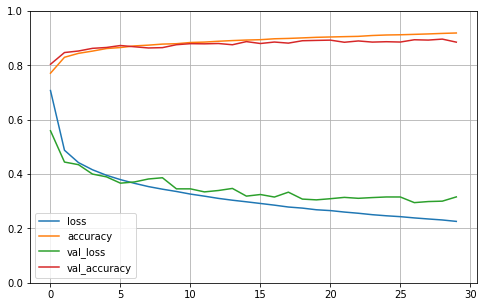

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 699us/step - loss: 59.9674 - accuracy: 0.8515


[59.96736145019531, 0.8514999747276306]

1/1 [==============================] - 0s 60ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)